In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
purchase=pd.read_csv('/content/drive/MyDrive/Final Fashion Dataset.csv')
purchase.head()

,user_id,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,link,ratings,review,Month,Price (USD)
0,93810,8493,Women,Apparel,Bottomwear,Skirts,Black,Fall,2011.0,Casual,Forever New Women Black Skirts,8493.jpg,http://assets.myntassets.com/v1/images/style/p...,5,Amazing quality! Definitely recommend. Would r...,November,46
1,24592,30757,Men,Apparel,Topwear,Kurtas,Grey,Summer,2012.0,Ethnic,Fabindia Men Grey Mangalgiri Kurta,30757.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"Perfect for any occasion, great buy..",September,29
2,13278,14881,Women,Accessories,Bags,Handbags,Black,Summer,2011.0,Casual,United Colors of Benetton Women Solid Black Ha...,14881.jpg,http://assets.myntassets.com/v1/images/style/p...,3,"It's okay, nothing special.!",October,39
3,46048,48449,Men,Apparel,Topwear,Tshirts,Blue,Summer,2012.0,Casual,French Connection Men Blue T-shirt,48449.jpg,http://assets.myntassets.com/v1/images/style/p...,5,"Comfortable and stylish, worth the price. and ...",August,39
4,42098,4697,Unisex,Accessories,Watches,Watches,Black,Winter,2016.0,Sports,ADIDAS Unisex Digital Duramo Black Watch,4697.jpg,http://assets.myntassets.com/v1/images/style/p...,4,"Perfect for any occasion, great buy.!",March,33


In [3]:
purchase.shape

(36484, 17)

In [4]:
purchase.id = purchase.id.astype('int64')

In [5]:
purchase.isnull().sum()

,0
user_id,0
id,0
gender,0
masterCategory,0
subCategory,0
articleType,0
baseColour,0
season,0
year,0
usage,0


In [6]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36484 entries, 0 to 36483
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             36484 non-null  int64  
 1   id                  36484 non-null  int64  
 2   gender              36484 non-null  object 
 3   masterCategory      36484 non-null  object 
 4   subCategory         36484 non-null  object 
 5   articleType         36484 non-null  object 
 6   baseColour          36484 non-null  object 
 7   season              36484 non-null  object 
 8   year                36484 non-null  float64
 9   usage               36484 non-null  object 
 10  productDisplayName  36484 non-null  object 
 11  filename            36484 non-null  object 
 12  link                36484 non-null  object 
 13  ratings             36484 non-null  int64  
 14  review              36484 non-null  object 
 15  Month               36484 non-null  object 
 16  Pric

In [7]:
purchase.nunique()

,0
user_id,4891
id,36484
gender,5
masterCategory,3
subCategory,13
articleType,77
baseColour,45
season,4
year,12
usage,7


In [8]:
purchase.dropna(inplace=True)

In [9]:
purchase.shape

(36484, 17)

In [10]:
catnames = [ 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season','usage','Month']
numnames = ['id','year','ratings','Price (USD)']

In [11]:
dict_unique = {
    "numerical_columns": numnames,
    "unique_values": [purchase[i].nunique() for i in numnames]
}

In [12]:
df_unique = pd.DataFrame(dict_unique)
df_unique

,numerical_columns,unique_values
0,id,36484
1,year,12
2,ratings,5
3,Price (USD),57


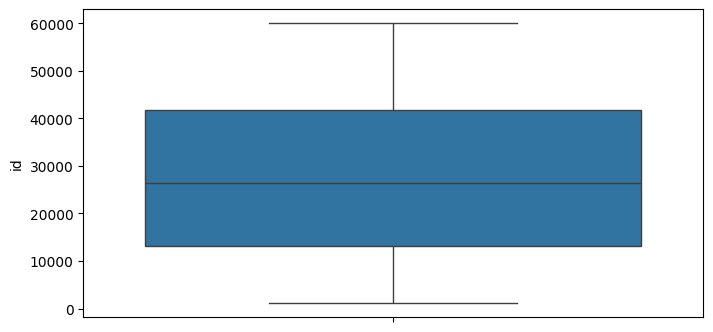

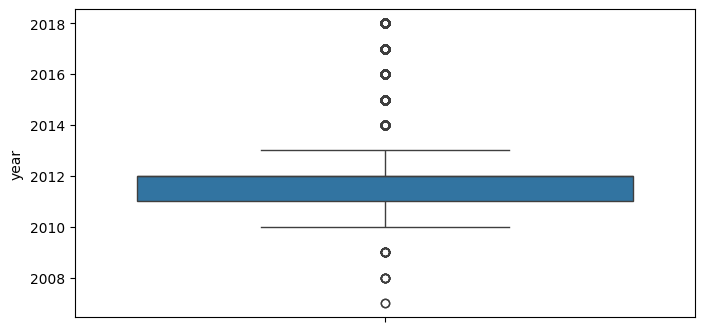

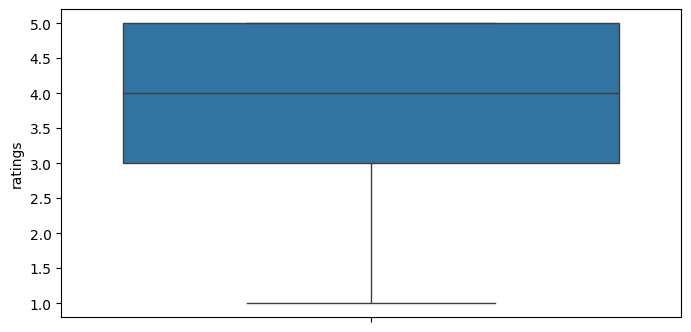

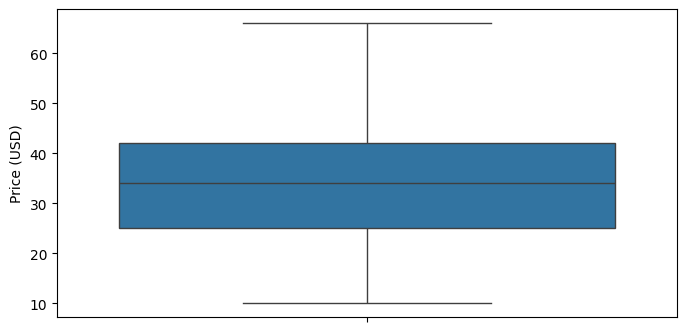

In [13]:
for i in numnames:
    plt.figure(figsize=(8,4))
    sns.boxplot(purchase[i])

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf


In [15]:
features = ['gender', 'masterCategory', 'articleType', 'baseColour', 'season', 'year', 'usage', 'ratings', 'Price (USD)']
target = 'subCategory'

In [16]:
label_encoders = {col: LabelEncoder() for col in features if purchase[col].dtype == 'object'}
for col, encoder in label_encoders.items():
    purchase[col] = encoder.fit_transform(purchase[col])

In [17]:
target_encoder = LabelEncoder()
purchase[target] = target_encoder.fit_transform(purchase[target])


In [18]:
X = purchase[features]
y = purchase[target]


In [19]:
scaler = StandardScaler()
X[['year', 'ratings', 'Price (USD)']] = scaler.fit_transform(X[['year', 'ratings', 'Price (USD)']])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LeakyReLU
from keras.layers import Dense

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(target_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [22]:
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2)


Epoch 1/25
730/730 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5751 - loss: 1.4036 - val_accuracy: 0.8270 - val_loss: 0.5386
Epoch 2/25
730/730 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8534 - loss: 0.4449 - val_accuracy: 0.8577 - val_loss: 0.4129
Epoch 3/25
730/730 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8706 - loss: 0.3779 - val_accuracy: 0.8849 - val_loss: 0.3400
Epoch 4/25
730/730 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8827 - loss: 0.3258 - val_accuracy: 0.8921 - val_loss: 0.3109
Epoch 5/25
730/730 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8959 - loss: 0.2889 - val_accuracy: 0.8919 - val_loss: 0.2807
Epoch 6/25
730/730 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9090 - loss: 0.2612 - val_accuracy: 0.9087 - val_loss: 0.2563
Epoch 7/25
730/730 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9114 - loss: 0.2573 - val_accuracy: 0.9108 - val_loss: 0.2540
Epoch 8/25
730/730 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9185 - loss: 0.2367 - val_accuracy: 0.

In [23]:
y_pred=model.predict(X_test)
y_pred
y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = y_pred.astype(int)
import numpy as np
np.column_stack((y_pred, y_test))

229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[ 0,  0,  0, ...,  0,  0, 10],
       [ 0,  0,  0, ...,  0,  0,  8],
       [ 1,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  8],
       [ 0,  0,  0, ...,  0,  1, 12],
       [ 0,  0,  0, ...,  0,  0, 10]])

In [24]:
scores = model.evaluate(X_test, y_test)

229/229 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9551 - loss: 0.1416


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 13)                  │             429 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,785 (61.66 KB)

 Trainable params: 5,261 (20.55 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,524 (41.11 KB)